In [1]:
import pandas as pd #import libraries
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud 
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
business_tip_merge = pd.read_csv('./cleaned_csv/business_tip_merge.csv',encoding='utf-8',low_memory=False) #open business_tip_merge
print('rows:',len(business_tip_merge))

rows: 782164


In [3]:
business_tip_merge.shape

(782164, 18)

In [4]:
business_tip_merge.head(1)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,user_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity,year_tip,month_tip
0,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,gastonia,NC,35.252842,-81.152698,3.5,3,"Hotels & Travel, Transportation, Taxis, Beer, ...",r1ZKGRxr05e0otkssLQZAA,"Awesome service got me and my car home, the dr...",2016-05-15 12:30:50,0,74,0.466667,0.433333,2016,2016-05


In [5]:
#examine the neutral tip review

In [6]:
neutral = business_tip_merge[business_tip_merge["polarity"]==0]

In [7]:
neutral.head(1)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,user_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity,year_tip,month_tip
5,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,phoenix,AZ,33.602822,-111.983533,4.0,10,"Food, Pretzels, Bakeries, Fast Food, Restaurants",Q4Qfu-3vYtL1LRm2X1b0Gg,Jalapeno pretzel!,2012-12-21 17:37:21,0,17,0.0,0.0,2012,2012-12


In [8]:
neutral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188153 entries, 5 to 782163
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       188153 non-null  object 
 1   name              188153 non-null  object 
 2   city              188153 non-null  object 
 3   state             188153 non-null  object 
 4   latitude          188153 non-null  float64
 5   longitude         188153 non-null  float64
 6   stars             188153 non-null  float64
 7   review_count      188153 non-null  int64  
 8   categories        188153 non-null  object 
 9   user_id           188153 non-null  object 
 10  tip_text          188153 non-null  object 
 11  tip_date          188153 non-null  object 
 12  compliment_count  188153 non-null  int64  
 13  tip_text_length   188153 non-null  int64  
 14  polarity          188153 non-null  float64
 15  subjectivity      188153 non-null  float64
 16  year_tip          18

In [9]:
from stop_words import get_stop_words

#filter out stop_words
STOP_WORDS = list(get_stop_words('en'))         #About 900 stopwords
should_remove = ["I","they","The","the","that","That","This","this","&","!","go","get"]
STOP_WORDS.extend(should_remove)

In [10]:
neutral['tip_text'] = neutral['tip_text'].apply(lambda x: " ".join(word for word in x.split() if word not in STOP_WORDS))

In [11]:
from collections import Counter
top20_neutral_word = Counter(" ".join(neutral['tip_text'].str.lower()).split()).most_common(20)
top20_neutral_word

[('they', 7203),
 ('try', 6606),
 ('place', 4378),
 ('get', 4287),
 ('food', 4088),
 ('like', 4074),
 ('can', 3735),
 ('order', 3651),
 ('just', 3623),
 ('open', 3564),
 ('lunch', 3537),
 ('time', 2978),
 ('come', 2978),
 ('no', 2851),
 ("don't", 2776),
 ('one', 2702),
 ('yummy', 2657),
 ('you', 2612),
 ('if', 2546),
 ('will', 2544)]

In [12]:
top20_neutral_word = pd.DataFrame(top20_neutral_word)

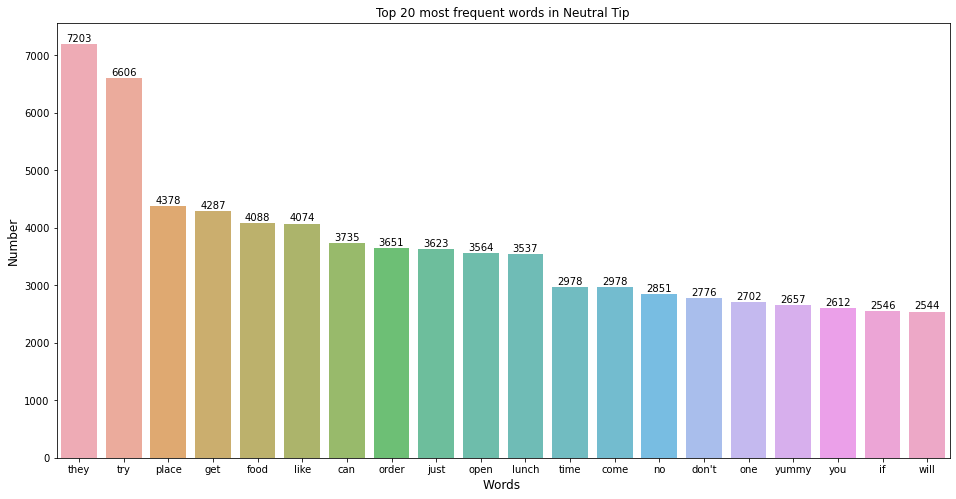

In [13]:
plt.figure(figsize=(16,8))
ax_top20= sns.barplot( top20_neutral_word[0],top20_neutral_word[1], alpha=0.8)
plt.title("Top 20 most frequent words in Neutral Tip")
plt.ylabel('Number', fontsize=12)
plt.xlabel('Words ', fontsize=12)

rects = ax_top20.patches
labels = top20_neutral_word[1]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax_top20.text(rect.get_x() + rect.get_width()/2, height + 6, label, ha='center', va='bottom')

plt.show()


In [14]:
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS

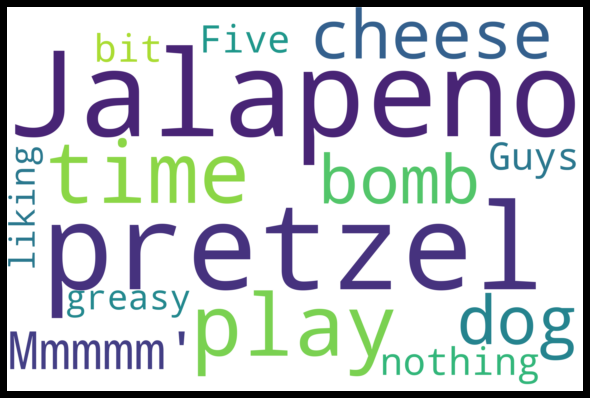

In [15]:
#word cloud
neutral_for_cloud = neutral['tip_text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(neutral_for_cloud))

fig = plt.figure(
    figsize = (8, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [16]:
#define polarity fuction
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
neutral['polarity'] = neutral.tip_text.apply(detect_polarity)

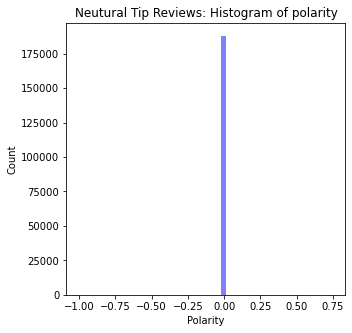

In [17]:
#Distribution of Polarity

num_bins = 50
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(neutral.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Neutural Tip Reviews: Histogram of polarity')
plt.show();

In [18]:
neutral.polarity.median()

0.0

In [19]:
neutral.polarity.mean()


-0.00014151519208573853

In [20]:
#examine postive Tip reviews

In [21]:
postive = business_tip_merge[business_tip_merge["polarity"]>0]

In [22]:
postive['tip_text'] = postive['tip_text'].apply(lambda x: " ".join(word for word in x.split() if word not in STOP_WORDS))

In [23]:
postive['polarity'] = postive.tip_text.apply(detect_polarity)

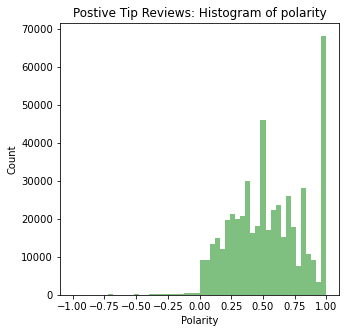

In [24]:
#Distribution of Polarity

num_bins = 50
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(postive.polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Postive Tip Reviews: Histogram of polarity')
plt.show();

In [25]:
postive.polarity.median()


0.5111111111111111

In [26]:
postive.polarity.mean()


0.5441045291286719

In [27]:
#examine negative tip reviews

In [28]:
negative = business_tip_merge[business_tip_merge["polarity"]<0]

In [29]:
negative['tip_text'] = negative['tip_text'].apply(lambda x: " ".join(word for word in x.split() if word not in STOP_WORDS))

In [30]:
negative['polarity'] = negative.tip_text.apply(detect_polarity)

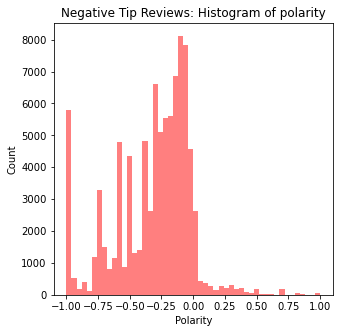

In [31]:
#Distribution of Polarity

num_bins = 50
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(negative.polarity, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Negative Tip Reviews: Histogram of polarity')
plt.show();

In [32]:
negative.polarity.median()


-0.25

In [33]:
negative.polarity.mean()


-0.3164858729570176

## create lablels


In [34]:

business_tip_merge['sentiment'] = business_tip_merge['polarity'].apply(lambda x: "Good" if x > 0 else "Poor" if x<0 else "Neutral")

In [35]:
business_tip_merge.head(1)

,business_id,name,city,state,latitude,longitude,stars,review_count,categories,user_id,tip_text,tip_date,compliment_count,tip_text_length,polarity,subjectivity,year_tip,month_tip,sentiment
0,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,gastonia,NC,35.252842,-81.152698,3.5,3,"Hotels & Travel, Transportation, Taxis, Beer, ...",r1ZKGRxr05e0otkssLQZAA,"Awesome service got me and my car home, the dr...",2016-05-15 12:30:50,0,74,0.466667,0.433333,2016,2016-05,Good


In [36]:
tip_review_subset = business_tip_merge[['tip_text','sentiment','polarity','subjectivity']]

In [37]:
tip_review_subset.head(5)

,tip_text,sentiment,polarity,subjectivity
0,"Awesome service got me and my car home, the dr...",Good,0.466667,0.433333
1,The owners are really kind and cute,Good,0.550000,0.950000
2,If the roll you want isn't already made tell t...,Good,0.375000,0.500000
3,"Good taste, good price, friendly people!",Good,0.622917,0.566667
4,This Wetzel's Pretzels is located in the PV Fo...,Good,0.100000,0.400000


In [38]:
tip_review_subset.describe()

,polarity,subjectivity
count,782164.000000,782164.000000
mean,0.311077,0.498265
std,0.407019,0.328017
min,-1.000000,0.000000
25%,0.000000,0.250000
50%,0.300000,0.566667
75%,0.625000,0.750000
max,1.000000,1.000000


In [39]:
tip_review_subset['sentiment'].value_counts()


Good       502862
Neutral    188153
Poor        91149
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Distrubution of setiment Before Text pre-processing')

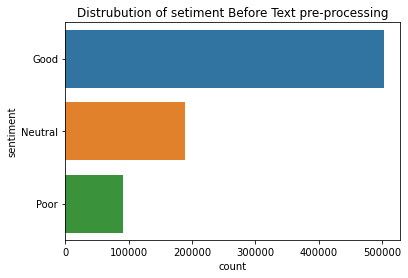

In [40]:
Distrubution_of_setiment= sns.countplot(y='sentiment', data=tip_review_subset);
Distrubution_of_setiment.set_title('Distrubution of setiment Before Text pre-processing')

In [41]:
# TextBlob (Sentiment analysis)

In [42]:
print(tip_review_subset.tip_text.iloc[0])

Awesome service got me and my car home, the drive was fun but professional


In [43]:
tip_review_subset.sentiment.iloc[0]

'Good'

In [44]:
review0 = TextBlob(tip_review_subset.tip_text.iloc[0])

In [45]:
round(review0.sentiment.polarity,2)

0.47

In [46]:
round(review0.sentiment.subjectivity,2)

0.43

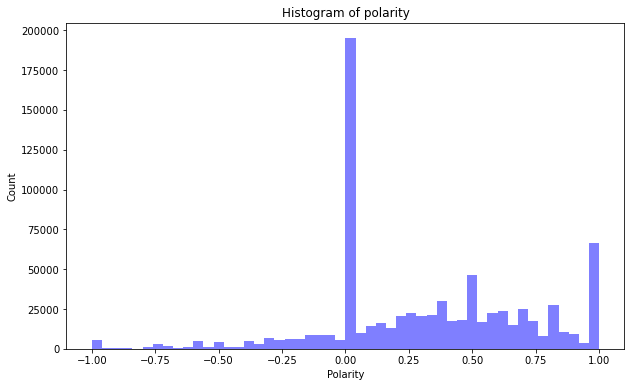

In [47]:
#Distribution of Polarity

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tip_review_subset.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [48]:
tip_review_subset.polarity.median()

0.3

In [49]:
tip_review_subset.polarity.mean()

0.31107656080320395

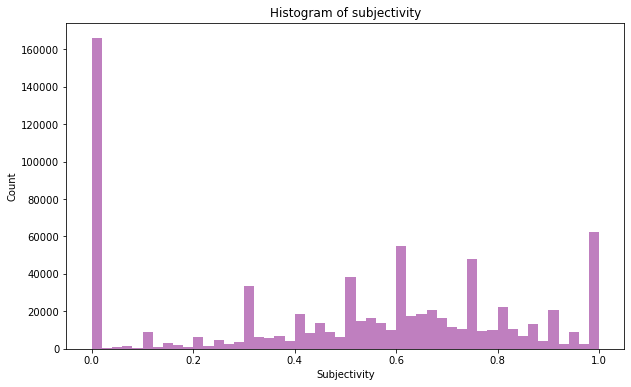

In [50]:
#Distribution of Subjectivity

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tip_review_subset.subjectivity, num_bins, facecolor='purple', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Histogram of subjectivity')
plt.show();

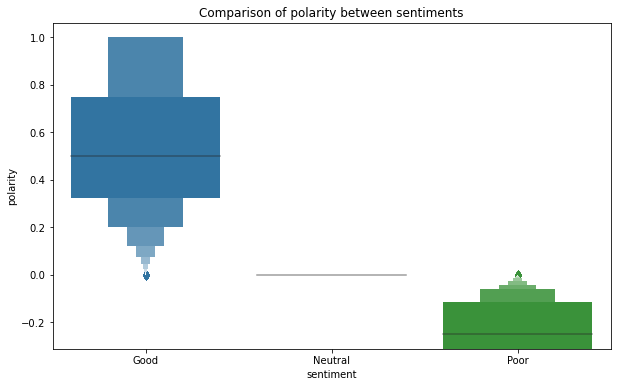

In [51]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='sentiment', y='polarity', data=tip_review_subset).set_title('Comparison of polarity between sentiments')
plt.show();

In [52]:
tip_review_subset[tip_review_subset['sentiment'] == "Good"].head(10)


,tip_text,sentiment,polarity,subjectivity
0,"Awesome service got me and my car home, the dr...",Good,0.466667,0.433333
1,The owners are really kind and cute,Good,0.550000,0.950000
2,If the roll you want isn't already made tell t...,Good,0.375000,0.500000
3,"Good taste, good price, friendly people!",Good,0.622917,0.566667
4,This Wetzel's Pretzels is located in the PV Fo...,Good,0.100000,0.400000
9,I never had very unpalatable Vietnamese beef s...,Good,0.200000,0.300000
10,Don't expect good service. That is a bonus.,Good,0.700000,0.600000
11,So yummy I visit this restaurant every time an...,Good,0.375000,0.750000
14,"Up and coming neighborhood with a living wall,...",Good,0.500000,0.500000
15,Love,Good,0.500000,0.600000


In [53]:
#Performance check for the TextBlob

In [54]:
pd.set_option('display.max_colwidth', -1)

In [55]:
#Highest score for TextBlob

In [56]:
tip_review_subset[tip_review_subset['polarity'] == 1]['tip_text'].head()

35     the amrita special!!!!!!!!!!          
117    Great place!!                         
173    Excellent ice cream shakes and sundaes
187    Almond praline is awesome!!!!!!       
229    Excellent pizza! Great service!       
Name: tip_text, dtype: object

In [57]:
#Lowest score for TextBlob

In [58]:
tip_review_subset[tip_review_subset['polarity'] == -1]['tip_text'].head()

52     Worst breakfast I have ever had.  Omelet was greasy and coffee was terrible.
316    Awful,,, never order again,, pizza dough and toppings had no flavor         
325    Horrible customer service.                                                  
582    A must have is the Sesame Chicken & Chocolate Cherry soycream!!!            
802    Just go inside. Drive through is insane                                     
Name: tip_text, dtype: object

In [59]:
allwords= ' '.join([x for x in tip_review_subset["tip_text"]])
wordCloud = WordCloud(width = 500, height = 300,  background_color = 'white',random_state = 123, max_font_size =119).generate(allwords)

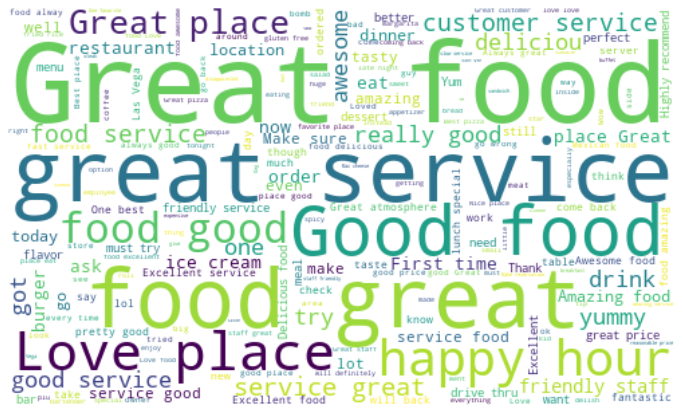

In [60]:
fig = plt.figure(figsize=(12, 8))
plt.axis('off')
plt.imshow(wordCloud,interpolation = "bilinear") # word cloud

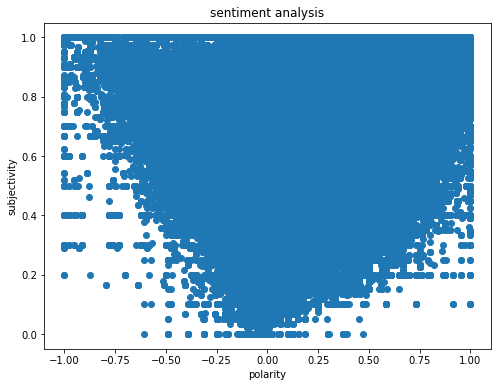

In [61]:
plt.figure(figsize = (8,6))
plt.scatter(tip_review_subset["polarity"], tip_review_subset["subjectivity"])
plt.title("sentiment analysis")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.show()

In [62]:
########################       Text processing       #########################

In [63]:
tip_review_subset = tip_review_subset[["tip_text","sentiment"]]

In [64]:
#lowercase

In [65]:
tip_review_subset["tip_text"] = tip_review_subset["tip_text"].str.lower() #.str.split()

In [66]:
#word count
tip_review_subset["original_word_count"] = tip_review_subset["tip_text"].apply(lambda x:len(x.split()))

In [67]:
#character count
tip_review_subset["original_character_count"] = tip_review_subset["tip_text"].apply(lambda x:len(x))

In [68]:
tip_review_subset.head(4)

,tip_text,sentiment,original_word_count,original_character_count
0,"awesome service got me and my car home, the drive was fun but professional",Good,14,74
1,the owners are really kind and cute,Good,7,35
2,if the roll you want isn't already made tell them and they'll make it fresh!,Good,15,76
3,"good taste, good price, friendly people!",Good,6,40


In [69]:
#average word
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)

In [70]:
tip_review_subset["original_average_word_length"] = tip_review_subset["tip_text"].apply(lambda x: average_words(x))

In [71]:
#stopword removal

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [73]:
STOP_WORDS = stopwords.words('english')

In [74]:
len(STOP_WORDS) # total number of stop words

179

In [75]:
should_keep = {'not','no','nor',"don't",'don','ain',"aren't",'couldn',"couldn't",'didn',
 "didn't",'doesn', "doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",
'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
"weren't",'won',"won't",'wouldn',"wouldn't"}

In [76]:
STOP_WORDS = [ele for ele in STOP_WORDS if ele not in should_keep]

In [77]:
len(STOP_WORDS) #final number of stop words

142

In [78]:
#create stopword_count and stopword ratio

In [79]:
tip_review_subset["stopword_count"] = tip_review_subset["tip_text"].apply(lambda x: len([word for word in x.split() if word.lower() in STOP_WORDS]))

In [80]:
tip_review_subset["stopword_ratio"] = tip_review_subset["stopword_count"]/tip_review_subset["original_word_count"] #create numerical feature


In [81]:
tip_review_subset["lower_case"] = tip_review_subset["tip_text"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [82]:
#remove punctuation

In [83]:
# Using regex 
p = re.compile(r'[^\w\s]+')
tip_review_subset['punctuation'] = [p.sub('', x) for x in tip_review_subset['lower_case'].tolist()]

In [84]:
tip_review_subset["non_stop_words"] = tip_review_subset["punctuation"].apply(lambda x: " ".join(word for word in x.split() if word not in STOP_WORDS))

In [85]:
other_stopwords_for_choose = pd.Series(" ".join(tip_review_subset["non_stop_words"]).split()).value_counts()[:100]

In [86]:
other_stopwords_for_choose

great      134151
food       126878
good       99501 
service    80706 
place      73510 
           ...   
tea        8287  
pretty     8224  
soup       8175  
take       8088  
check      8076  
Length: 100, dtype: int64

In [87]:
other_stop_words = ['go','also','try',"get","got",'went',"came","ive","im","come"]

In [88]:
len(other_stop_words)

10

In [89]:
tip_review_subset["cleaned_text"] = tip_review_subset["non_stop_words"].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [90]:
tip_review_subset["cleaned_text"].head(1)

0    awesome service car home drive fun professional
Name: cleaned_text, dtype: object

In [91]:
#filter out non-English words

In [92]:
tip_review_subset.cleaned_text = tip_review_subset.cleaned_text.str.replace(r"[^a-zA-Z\d\_]+", " ")

In [93]:
#drop rows that contain too tittle information (word count <1) & non-English word
indexNames = tip_review_subset[tip_review_subset["original_word_count"] <=1].index
 
# Delete these row indexes from dataFrame
tip_review_subset.drop(indexNames , inplace=True)

In [94]:
indexNames = tip_review_subset[tip_review_subset["stopword_count"] ==0].index
 
# Delete these row indexes from dataFrame
tip_review_subset.drop(indexNames , inplace=True)

In [95]:
tip_review_subset.shape

(641670, 11)

In [96]:
#Original codes are from <Python 3 Text Processing with NLTK 3 Cookbook> (Perkins, 2014)

#Removing Carriage Return and Newline Characters

class CarriageReturnReplacer(object):  
    def replace(self, text):
        s = text
        s = s.replace('\r\n', ' ')
        s = s.replace('\n\n', ' ') 
        s = s.replace('\n', ' ')
        s = s.replace('\r', ' ') 
        return s
    
newline_replacer = CarriageReturnReplacer()

In [97]:
#Removing Extra Spaces

class ExtraSpacesReplacer(object): 
    def replace(self, text):
        s = text
        s = re.sub("\s\s+", " ", s)
        return s
    
spaces_replacer = ExtraSpacesReplacer()

In [98]:
#Removing Contractions

replacement_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'i\'m', 'i am'),
    (r'I\'m', 'I am'),
    (r'ain\'t', 'is not'),
    (r'(\w+)\'ll', '\g<1> will'),
    (r'(\w+)n\'t', '\g<1> not'),
    (r'(\w+)\'ve', '\g<1> have'),
    (r'(\w+)\'s', '\g<1> is'),
    (r'(\w+)\'re', '\g<1> are'),
    (r'(\w+)\'d', '\g<1> would'),
]

class ContractionReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    
    def replace(self, text):
        s = text

        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)

        return s

    
contraction_replacer = ContractionReplacer()

In [99]:
# replace new line character
tip_review_subset['cleaned_text'] = tip_review_subset['cleaned_text'].apply(newline_replacer.replace)

In [100]:
# replace extra spaces
tip_review_subset['cleaned_text'] = tip_review_subset['cleaned_text'].apply(spaces_replacer.replace)

In [101]:
# replace contractions
tip_review_subset['cleaned_text'] = tip_review_subset['cleaned_text'].apply(contraction_replacer.replace)

In [102]:
tip_review_subset.head(1)

,tip_text,sentiment,original_word_count,original_character_count,original_average_word_length,stopword_count,stopword_ratio,lower_case,punctuation,non_stop_words,cleaned_text
0,"awesome service got me and my car home, the drive was fun but professional",Good,14,74,4.357143,6,0.428571,"awesome service got me and my car home, the drive was fun but professional",awesome service got me and my car home the drive was fun but professional,awesome service got car home drive fun professional,awesome service car home drive fun professional


In [103]:
#lemmatization

In [104]:
import nltk

nltk.download('wordnet')


[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [105]:
lemmatizer = WordNetLemmatizer()

In [106]:
def clean_text(text):
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

tip_review_subset['cleaned_text'] = tip_review_subset.cleaned_text.apply(lambda x: clean_text(x))

In [107]:
tip_review_subset['cleaned_text_char_count'] = tip_review_subset['cleaned_text'].apply(len)

In [108]:
tip_review_subset['cleaned_text_word_count'] = tip_review_subset['cleaned_text'].apply(lambda x: len(x.split()))

In [109]:
tip_review_subset["cleaned_rate"] = tip_review_subset["cleaned_text_word_count"]/tip_review_subset["original_word_count"]

In [110]:
tip_review_subset['cleaned_text_word_density'] = tip_review_subset['cleaned_text_char_count'] / (tip_review_subset['cleaned_text_word_count']+1)

In [111]:
#new average word
def new_average_words(x):
    words = x.split(" ")
    return sum(len(word) for word in words) / len(words)

tip_review_subset["cleaned_text_average_word_length"] = tip_review_subset["cleaned_text"].apply(lambda x: new_average_words(x))

In [112]:
tip_review_subset.describe()

,original_word_count,original_character_count,original_average_word_length,stopword_count,stopword_ratio,cleaned_text_char_count,cleaned_text_word_count,cleaned_rate,cleaned_text_word_density,cleaned_text_average_word_length
count,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000,641670.000000
mean,12.679851,69.808077,4.680749,4.663305,0.344312,45.499843,7.495141,0.615345,5.096302,5.237782
std,10.461265,56.462170,0.811274,4.871917,0.124031,35.319503,5.690784,0.133659,0.974775,0.993071
min,2.000000,3.000000,1.000000,1.000000,0.011236,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,37.000000,4.142857,2.000000,0.250000,24.000000,4.000000,0.500000,4.500000,4.600000
50%,10.000000,57.000000,4.592593,3.000000,0.333333,38.000000,6.000000,0.611111,5.166667,5.142857
75%,15.000000,80.000000,5.125000,6.000000,0.428571,54.000000,9.000000,0.714286,5.727273,5.750000
max,110.000000,500.000000,47.500000,61.000000,1.000000,471.000000,94.000000,1.400000,43.000000,59.000000


In [113]:
tip_review_subset.head(1)

,tip_text,sentiment,original_word_count,original_character_count,original_average_word_length,stopword_count,stopword_ratio,lower_case,punctuation,non_stop_words,cleaned_text,cleaned_text_char_count,cleaned_text_word_count,cleaned_rate,cleaned_text_word_density,cleaned_text_average_word_length
0,"awesome service got me and my car home, the drive was fun but professional",Good,14,74,4.357143,6,0.428571,"awesome service got me and my car home, the drive was fun but professional",awesome service got me and my car home the drive was fun but professional,awesome service got car home drive fun professional,awesome service car home drive fun professional,47,7,0.5,5.875,5.857143


In [114]:
#minmaxscaler

In [115]:
scaler = MinMaxScaler()
tip_review_subset[['original_word_count', 'original_character_count', 'original_average_word_length', 'stopword_count','cleaned_text_char_count','cleaned_text_word_count','cleaned_text_average_word_length','cleaned_text_word_density']] = scaler.fit_transform(tip_review_subset[['original_word_count', 'original_character_count', 'original_average_word_length', 'stopword_count','cleaned_text_char_count','cleaned_text_word_count','cleaned_text_average_word_length','cleaned_text_word_density']])

In [116]:
tip_review_subset = tip_review_subset[['sentiment', 'cleaned_text','original_word_count','original_character_count','original_average_word_length','stopword_count','stopword_ratio','cleaned_text_char_count','cleaned_text_word_count','cleaned_rate','cleaned_text_average_word_length','cleaned_text_word_density']]

In [117]:
tip_review_subset.dropna(inplace=True)

In [118]:
tip_review_subset.sentiment.value_counts()

Good       433270
Neutral    128450
Poor       79950 
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'New Distrubution of Setiment After Cleanning')

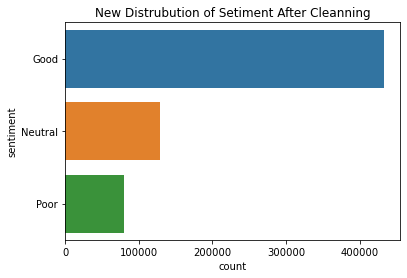

In [119]:
Distrubution_of_setiment_new= sns.countplot(y='sentiment', data=tip_review_subset);
Distrubution_of_setiment_new.set_title('New Distrubution of Setiment After Cleanning') #distribution of sentiment
#Good Tips are too many, means that we have a inbalanced dataset

Multicollinearity

In [120]:
# https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [122]:
check_colli = tip_review_subset[[ "original_word_count","original_character_count","original_average_word_length","stopword_count","stopword_ratio","cleaned_text_char_count","cleaned_text_word_count","cleaned_rate","cleaned_text_average_word_length","cleaned_text_word_density"]]

In [123]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(123)
df = pd.DataFrame(rs.rand(10, 10))
corr = check_colli.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,original_word_count,original_character_count,original_average_word_length,stopword_count,stopword_ratio,cleaned_text_char_count,cleaned_text_word_count,cleaned_rate,cleaned_text_average_word_length,cleaned_text_word_density
original_word_count,1.000000,0.987449,-0.162389,0.944129,0.229272,0.938919,0.956441,-0.219802,-0.052937,0.350172
original_character_count,0.987449,1.000000,-0.037385,0.908294,0.167681,0.972847,0.968891,-0.150533,0.040081,0.441154
original_average_word_length,-0.162389,-0.037385,1.000000,-0.250371,-0.423064,0.063633,-0.051552,0.490670,0.753116,0.620616
stopword_count,0.944129,0.908294,-0.250371,1.000000,0.471105,0.802383,0.817390,-0.423168,-0.051077,0.270611
stopword_ratio,0.229272,0.167681,-0.423064,0.471105,1.000000,0.013446,0.018870,-0.860684,-0.044110,-0.125434
cleaned_text_char_count,0.938919,0.972847,0.063633,0.802383,0.013446,1.000000,0.982838,0.022169,0.099816,0.517303
cleaned_text_word_count,0.956441,0.968891,-0.051552,0.817390,0.018870,0.982838,1.000000,0.014601,-0.045262,0.397683
cleaned_rate,-0.219802,-0.150533,0.490670,-0.423168,-0.860684,0.022169,0.014601,1.000000,0.060845,0.176752
cleaned_text_average_word_length,-0.052937,0.040081,0.753116,-0.051077,-0.044110,0.099816,-0.045262,0.060845,1.000000,0.776970
cleaned_text_word_density,0.350172,0.441154,0.620616,0.270611,-0.125434,0.517303,0.397683,0.176752,0.776970,1.000000


In [124]:
tip_review_subset.drop(columns = ["original_character_count",'stopword_count','cleaned_text_char_count','cleaned_text_average_word_length',"cleaned_text_word_count","cleaned_rate","cleaned_text_word_density"],inplace = True)

In [125]:
tip_review_cleaned_df = tip_review_subset.copy()

In [126]:
##############

In [127]:
tip_review_cleaned_df.sentiment.value_counts()

Good       433270
Neutral    128450
Poor       79950 
Name: sentiment, dtype: int64

In [128]:
#Downsample majority class

# Separate majority and minority classes
df_majority = tip_review_cleaned_df[tip_review_cleaned_df.sentiment=="Good"]
df_minority = tip_review_cleaned_df[tip_review_cleaned_df.sentiment=="Poor"]

In [129]:
from sklearn.utils import resample

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=79950,     # to match minority class
                                 random_state=123) # reproducible results

In [130]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [131]:
# Display new class counts
df_downsampled.sentiment.value_counts()

Good    79950
Poor    79950
Name: sentiment, dtype: int64

In [132]:
#downsample "Poor" reviews

In [133]:
df_majority_neutral = tip_review_cleaned_df[tip_review_cleaned_df.sentiment=="Neutral"]
df_majority_downsampled_neutral = resample(df_majority_neutral, 
                                 replace=False,    # sample without replacement
                                 n_samples=79950,     # to match minority class
                                 random_state=123) # reproducible results

In [134]:
# Combine minority class with downsampled majority class
df_downsampled_2 = pd.concat([df_majority_downsampled_neutral,df_majority_downsampled, df_minority])

In [135]:
df_downsampled_2.sentiment.value_counts()

Good       79950
Neutral    79950
Poor       79950
Name: sentiment, dtype: int64

In [136]:
#save to csv and name it as "feature_df"

In [137]:
df_downsampled_2.dropna(inplace = True)

In [138]:
df_downsampled_2.isnull().sum()

sentiment                       0
cleaned_text                    0
original_word_count             0
original_average_word_length    0
stopword_ratio                  0
dtype: int64

In [139]:
df_downsampled_2.to_csv('./cleaned_csv/feature_df.csv', encoding='utf-8', index=False)

In [140]:
df_downsampled_2.columns

Index(['sentiment', 'cleaned_text', 'original_word_count',
       'original_average_word_length', 'stopword_ratio'],
      dtype='object')

In [141]:
check_colli1 = df_downsampled_2[["original_word_count","original_average_word_length","stopword_ratio"]]

In [142]:
rs1 = np.random.RandomState(123)
df1 = pd.DataFrame(rs1.rand(10, 10))
corr1 = check_colli1.corr()
corr1.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,original_word_count,original_average_word_length,stopword_ratio
original_word_count,1.000000,-0.149493,0.212050
original_average_word_length,-0.149493,1.000000,-0.395851
stopword_ratio,0.212050,-0.395851,1.000000


In [ ]:
#The above heatmap is the correlation map for the final three numerical features